In [53]:
import pandas as pd
from pandas import datetime
import numpy as np
from matplotlib import pyplot as plt

In [54]:
df=pd.read_csv("candy_production.csv")

In [55]:
df.head(3)

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229


In [56]:
df.columns=["Month","Sales"]

In [57]:
df.head(2)

,Month,Sales
0,1972-01-01,85.6945
1,1972-02-01,71.8200


In [58]:
df=df.drop(['Month'],axis=1)

<Axes: >

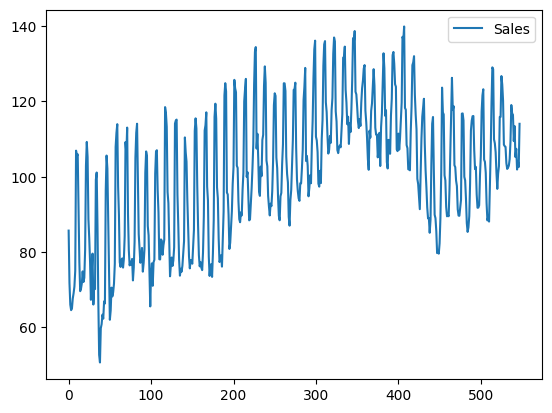

In [59]:
df.plot()

In [60]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")

In [61]:
from statsmodels.tsa.stattools import adfuller


In [62]:
df['12log']=np.log(df['Sales'])

In [63]:
df.head(20)

,Sales,12log
0,85.6945,4.450789
1,71.8200,4.274163
2,66.0229,4.190002
3,64.5645,4.167665
4,65.0100,4.174541
5,67.6467,4.214299
6,69.0429,4.234728
7,70.8370,4.260381
8,75.0462,4.318104
9,106.9289,4.672164


In [64]:
df['12shift_log']=df['12log']-df['12log'].shift(12)

In [65]:
adfuller_test(df['12log'].dropna())

is non-stationary 


In [68]:
# adfuller_test(df['Sales First Difference'].dropna())
# df['Sales First Difference'] = df - df.shift(1)

In [69]:
# adfuller_test(df['Sales First Difference'].dropna())
# df=df.drop(['Sales'],axis=1)
# df.head(2)

is stationary


In [70]:
df.head(5)

,Sales,Sales First Difference
0,85.6945,NaN
1,71.8200,-13.8745
2,66.0229,-5.7971
3,64.5645,-1.4584
4,65.0100,0.4455


In [19]:
# df=df.drop(['Sales'], axis=1)
df=df.dropna()
df.head()

,Sales,12log,12shift_log
12,91.2997,4.514148,0.063359
13,77.2700,4.347306,0.073143
14,69.6110,4.242923,0.052921
15,70.2986,4.252752,0.085087
16,71.6822,4.272242,0.097701


In [20]:
df=df.reset_index()

In [21]:

df=df.drop(['index','Sales','12log'],axis=1)

In [67]:
df.head()

,Sales,12log,12shift_log
0,85.6945,4.450789,NaN
1,71.8200,4.274163,NaN
2,66.0229,4.190002,NaN
3,64.5645,4.167665,NaN
4,65.0100,4.174541,NaN


In [66]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

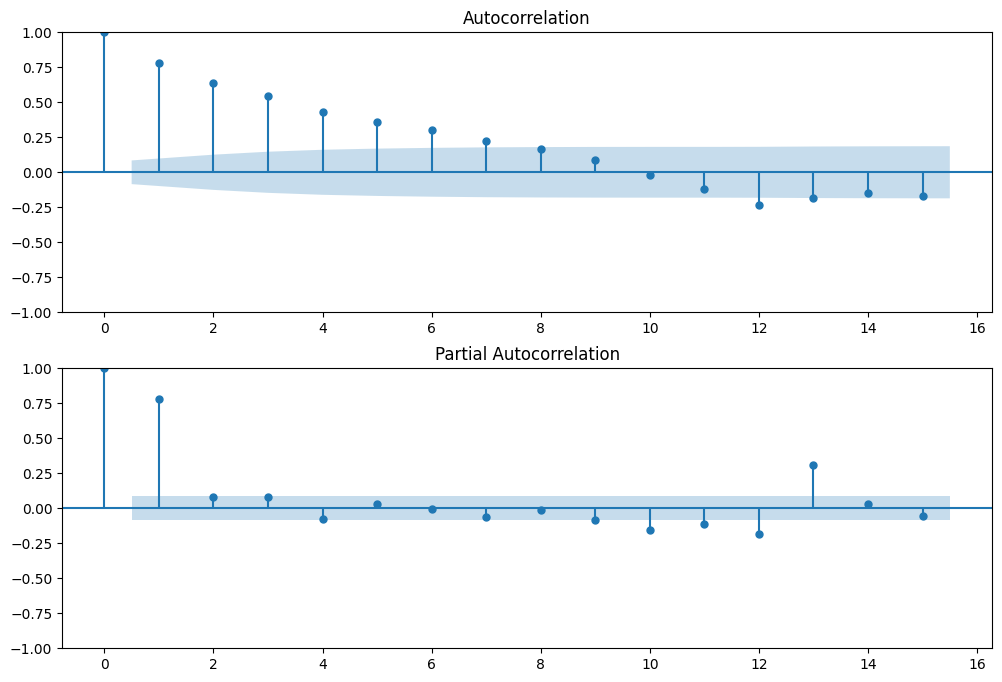

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=15,ax=ax2)

In [68]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [69]:
import warnings

warnings.filterwarnings("ignore")

In [70]:
df.head()

,Sales,12log,12shift_log
0,85.6945,4.450789,NaN
1,71.8200,4.274163,NaN
2,66.0229,4.190002,NaN
3,64.5645,4.167665,NaN
4,65.0100,4.174541,NaN


In [72]:
autoarima_model = auto_arima(df['12shift_log'].dropna(), trace=True,  suppress_warnings=True)
autoarima_model.summary()

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1761.548, Time=4.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1253.481, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1749.286, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1558.892, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1249.887, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1750.709, Time=1.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1749.557, Time=2.92 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1752.576, Time=1.89 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1751.240, Time=1.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1750.946, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1752.513, Time=3.66 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1752.961, Time=3.01 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1769.488, Time=5.02 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1751.759, Time=5.44 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1747.398, Time=5.19

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  536
Model:               SARIMAX(3, 0, 3)   Log Likelihood                 895.675
Date:                Fri, 19 Jan 2024   AIC                          -1777.351
Time:                        08:23:32   BIC                          -1747.362
Sample:                             0   HQIC                         -1765.618
                                - 536                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6539      0.063    -10.424      0.000      -0.777      -0.531
ar.L2          0.5168      0.048     10.830      0.000       0.423       0.610
ar.L3          0.6862      0.033     20.912      0.000       0.622       0.750
ma.L1          1.4165      0.070     20.279      0.000       1.280       1.553
ma.L2          0.5031      0.102      4.921      0.000       0.303       0.703
ma.L3         -0.2530      0.052     -4.898      0.000      -0.354      -0.152
sigma2         0.0020   8.74e-05     23.289      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               292.78
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.35
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
size = int(len(df) * 0.85)
train= df[:size]
test= df[size:]
print(size)

465


In [74]:
model=SARIMAX(train['12log'],order=(3,0,3),seasonal_order=(3,0,3,12))
# model=ARIMA(train,order=(2,0,3))
results=model.fit()

In [77]:
len(train)

465

In [78]:
forecast=results.forecast(steps=len(test))
#  we can use this also for prediction
# forecast=results.predict(start=len(train)+1 ,end=len(df), dynamic=True)

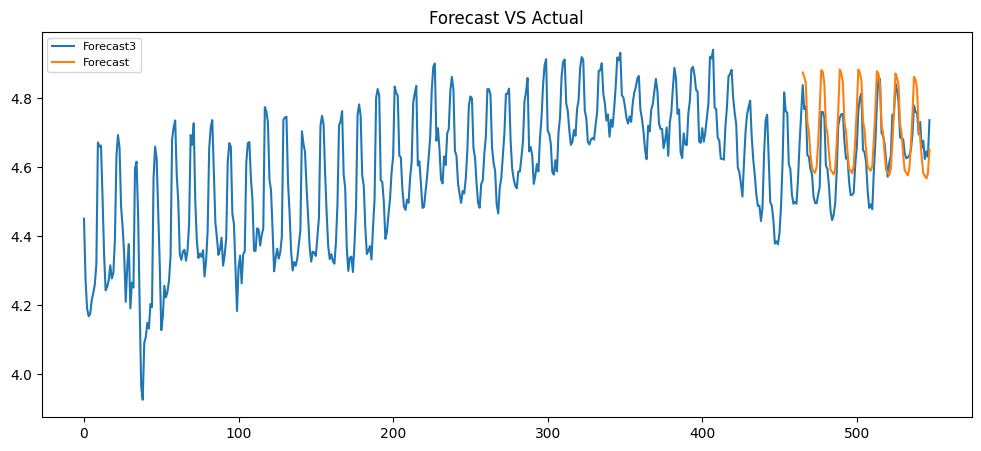

In [80]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['12log'],label='Forecast3')
plt.plot(forecast, label='Forecast')
# # plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame

In [83]:
rmse= sqrt(mean_squared_error(forecast,test['12log']))
rmse

0.08055314120148063

<Axes: ylabel='Density'>

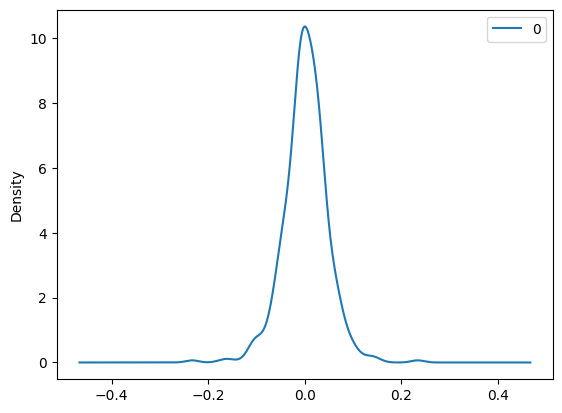

In [50]:
residual=DataFrame(results.resid)
residual.plot(kind='kde')

In [51]:
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = results.forecast(steps=forecast_steps+20) 

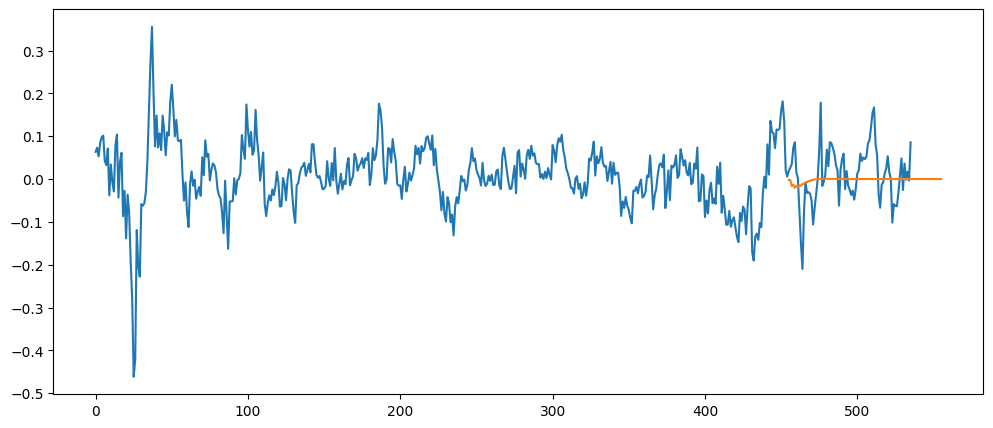

In [52]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Training')
plt.plot(forecast, label='Forecast')